### Problem 1: SVM
(a)

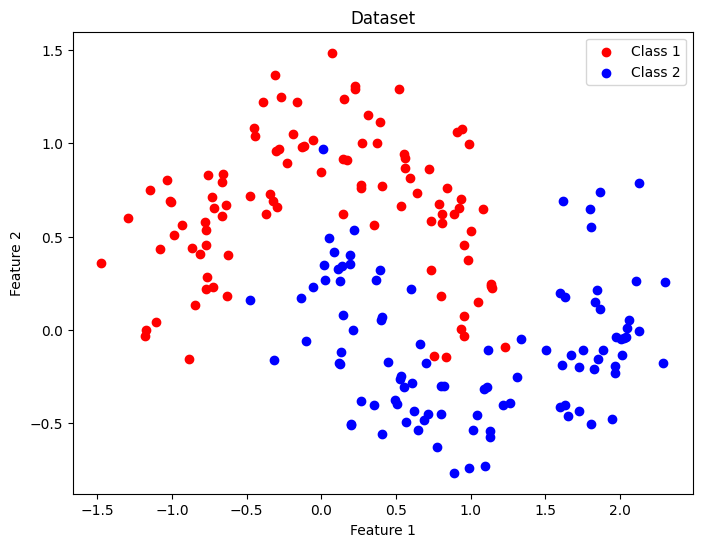

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score


x, y = make_moons(n_samples=200, noise=0.2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='red', label='Class 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', label='Class 2')
plt.legend()
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<div style="page-break-after: always;"></div>
(b) What effects does parameter C have on the model:

Smaller values of C allow for a wider margin, potentially misclassifying some points but aiming for better generalization. Larger values of C try to classify all training points correctly, which may lead to overfitting.

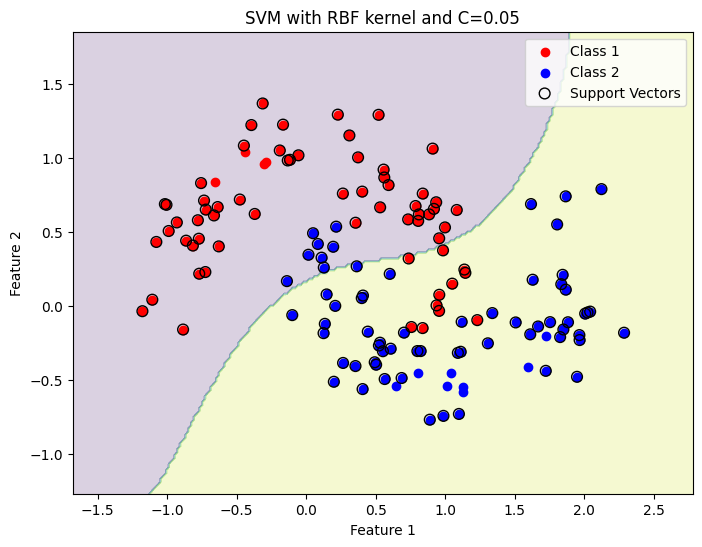

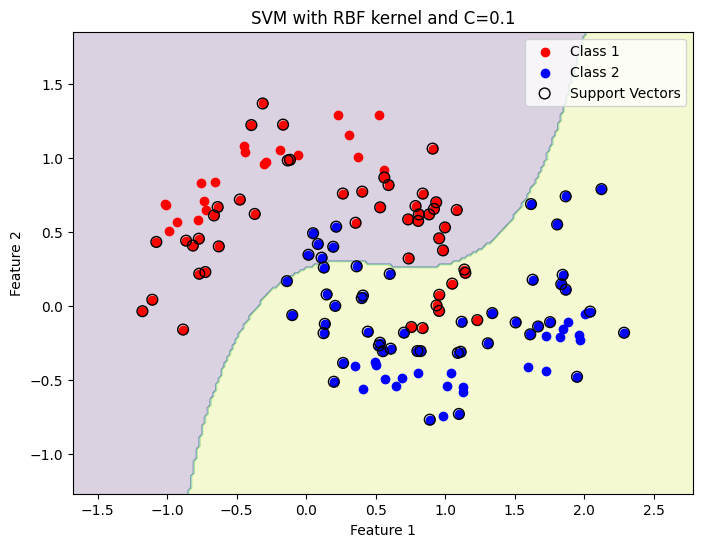

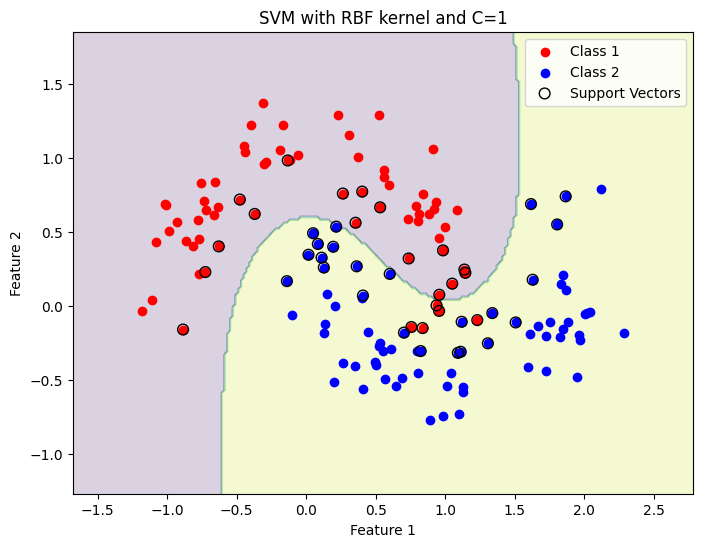

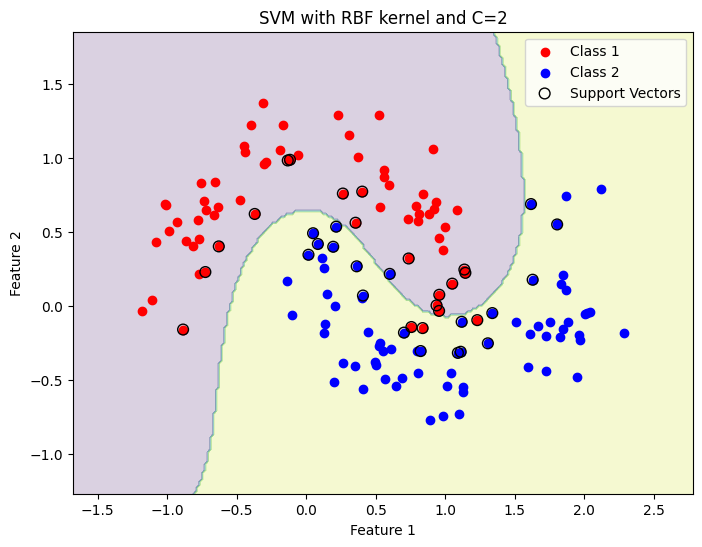

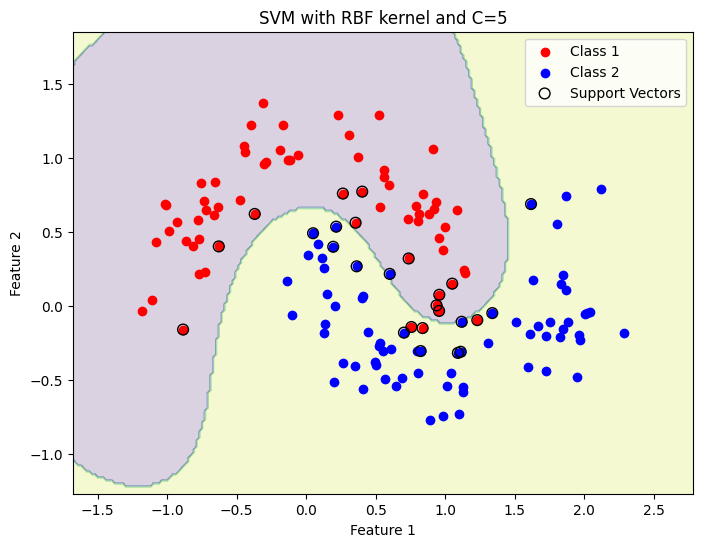

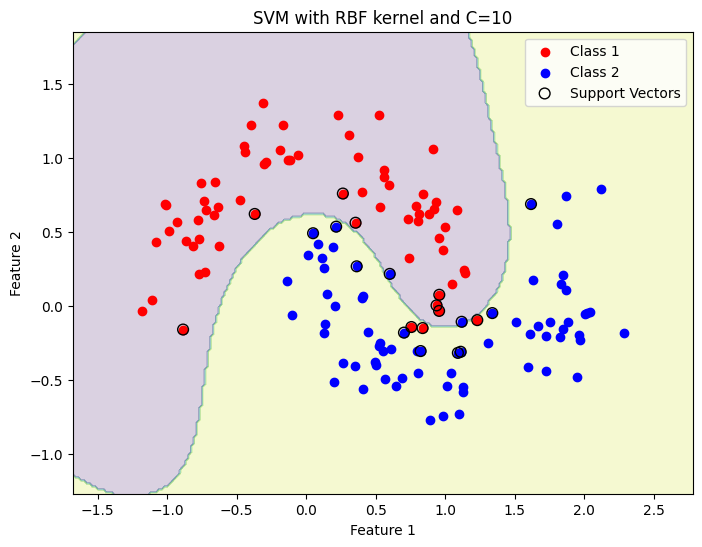

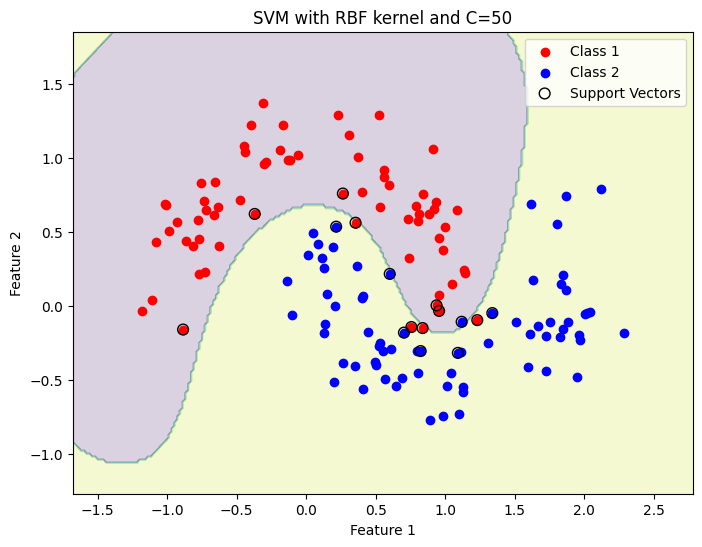

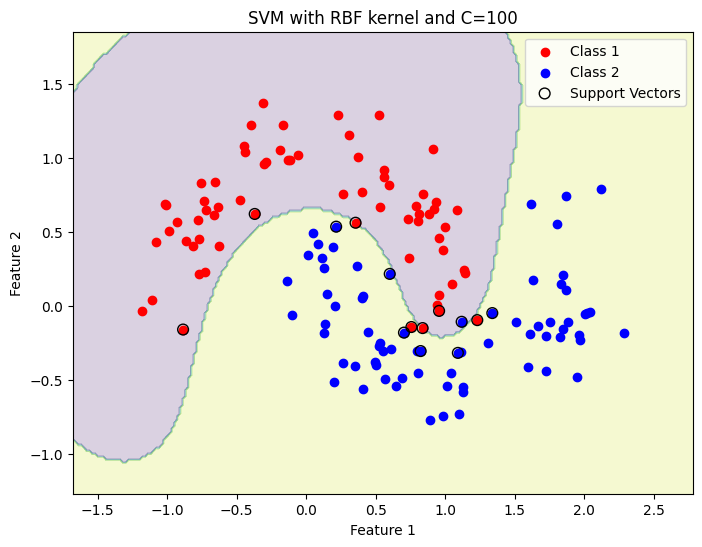

In [2]:
def plot_decision_boundary(model, x, y, title):
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, alpha=0.2)
    plt.scatter(x[y == 0, 0], x[y == 0, 1], color='red', label='Class 1')
    plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', label='Class 2')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=60, facecolors='none', edgecolors='k', label='Support Vectors')
    plt.legend()
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


c_values = [0.05, 0.1, 1, 2, 5, 10, 50, 100]
for c in c_values:
    svm_res = SVC(kernel='rbf', C=c)
    svm_res.fit(x_train, y_train)
    title = f'SVM with RBF kernel and C={c}'
    plot_decision_boundary(svm_res, x_train, y_train, title)

<div style="page-break-after: always;"></div>
(c)

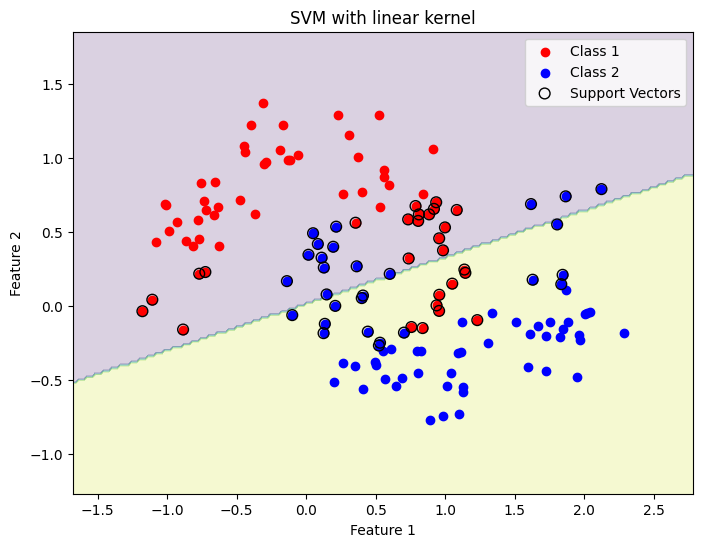

Test accuracy: 0.8333333333333334


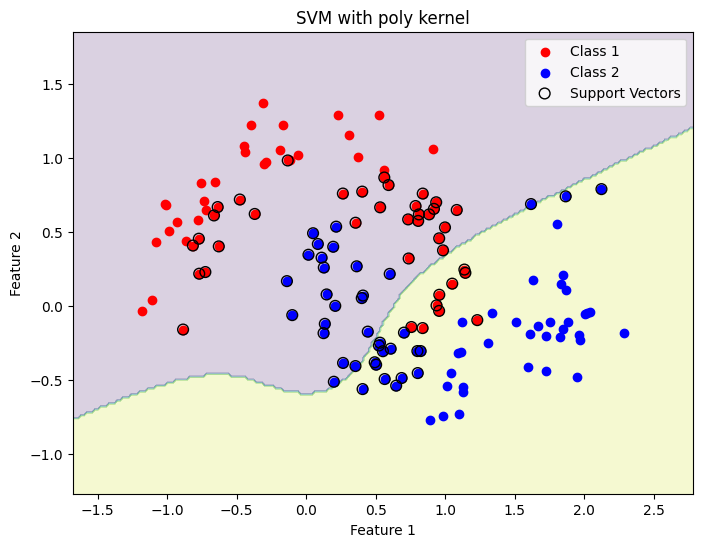

Test accuracy: 0.8


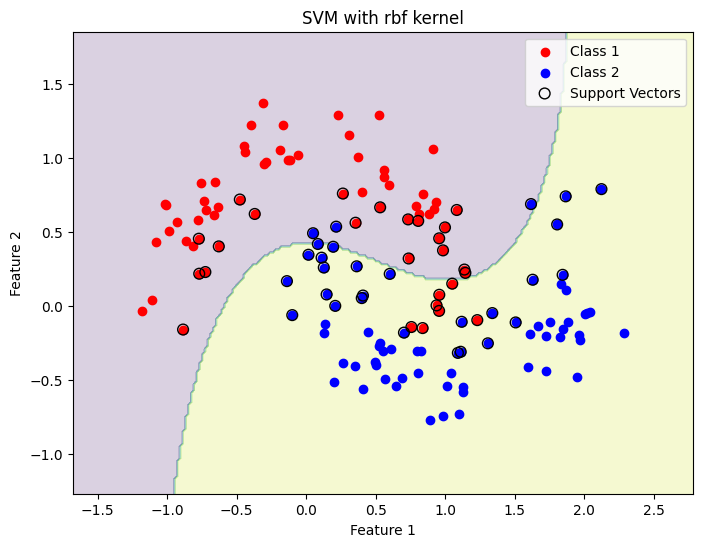

Test accuracy: 0.9666666666666667


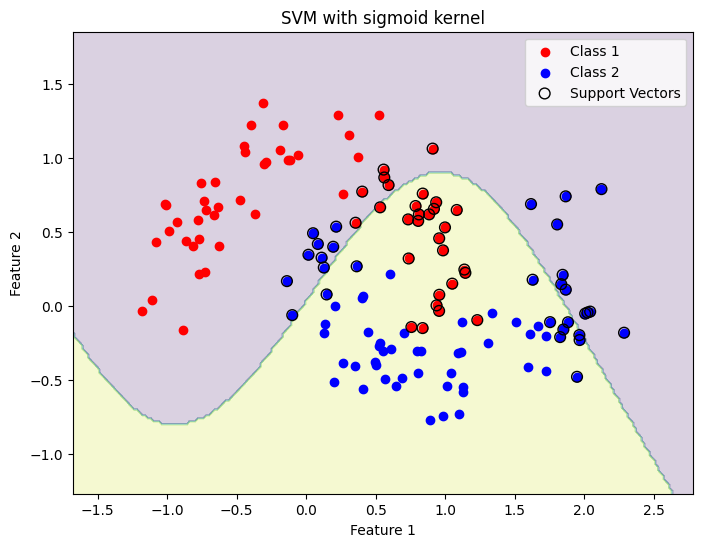

Test accuracy: 0.7
The kernel with the best performance on the test dataset is: 'rbf'


In [3]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
test_accuracies = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1, gamma='auto')
    svm_model.fit(x_train, y_train)
    title = f'SVM with {kernel} kernel'
    plot_decision_boundary(svm_model, x_train, y_train, title)
    y_pred = svm_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies[kernel] = accuracy
    print(f"Test accuracy: {accuracy}")

best_kernel = max(test_accuracies, key=test_accuracies.get)
print(f"The kernel with the best performance on the test dataset is: '{best_kernel}'")

<div style="page-break-after: always;"></div>

### Problem 2: ANN
(a)

<div style="page-break-after: always;"></div>
(b)

<div style="page-break-after: always;"></div>
(c)

Hidden layer size (10,): Train Accuracy = 1.0000, Test Accuracy = 0.9481
Hidden layer size (20,): Train Accuracy = 1.0000, Test Accuracy = 0.9537
Hidden layer size (30,): Train Accuracy = 1.0000, Test Accuracy = 0.9759
Hidden layer size (40,): Train Accuracy = 1.0000, Test Accuracy = 0.9759
Hidden layer size (50,): Train Accuracy = 1.0000, Test Accuracy = 0.9685
Hidden layer size (60,): Train Accuracy = 1.0000, Test Accuracy = 0.9722
Hidden layer size (70,): Train Accuracy = 1.0000, Test Accuracy = 0.9778
Hidden layer size (80,): Train Accuracy = 1.0000, Test Accuracy = 0.9741
Hidden layer size (90,): Train Accuracy = 1.0000, Test Accuracy = 0.9778
Hidden layer size (100,): Train Accuracy = 1.0000, Test Accuracy = 0.9667


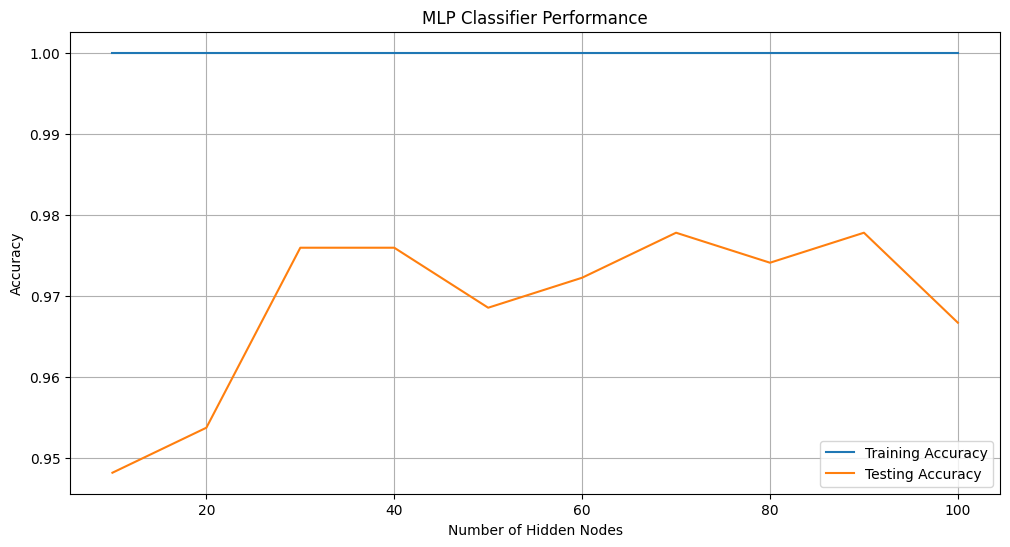


The best number of hidden nodes is: 70 with a test accuracy of 0.9778


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


digits = load_digits()
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

hidden_layer_sizes = [(n,) for n in range(10, 101, 10)]

best_hidden_size = None
best_model = None
best_accuracy = 0

test_accuracies = []
train_accuracies = []

for size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=size, activation='relu', solver='adam',
                        max_iter=500, random_state=42)
    
    mlp.fit(x_train, y_train)
    
    y_train_pred = mlp.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    y_test_pred = mlp.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_hidden_size = size
        best_model = mlp
    
    print(f"Hidden layer size {size}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

hidden_nodes = [size[0] for size in hidden_layer_sizes]
plt.figure(figsize=(12, 6))
plt.plot(hidden_nodes, train_accuracies, label='Training Accuracy')
plt.plot(hidden_nodes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Accuracy')
plt.title('MLP Classifier Performance')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nThe best number of hidden nodes is: {best_hidden_size[0]} with a test accuracy of {best_accuracy:.4f}")